<a href="https://colab.research.google.com/github/alfredoEP/Redes-Neuronales-Duchanoy/blob/master/Preprocesamiento%20Simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, exposure, io, color
from skimage.transform import rescale, resize, downscale_local_mean
from google.colab import files

In [0]:
# Aquí enlisto los archivos del directorio de colab
temp_ls = !ls
ls=[]
for i in temp_ls:
  ls.append(i.replace('\t','  '))

for i,j in enumerate(ls):
  ls[i] = j.split('  ')

new_ls = []
for i in ls:
  for j in i:
    new_ls.append(j)
ls = new_ls

In [0]:
# En esta lista llamada 'matriz' se guardarán las imágenes
matriz = []
for i in ls:
  matriz.append(plt.imread(i))
matriz = np.array(matriz)

In [0]:
# Parámetros de las imágenes de salida // → Pueden alterarse a conveniencia
altura_máxima = 100; ancho_máximo = 300

In [0]:
# Bucle donde se cambia de tamaño la imagen
for i, imagen in enumerate(matriz):
  nuevo_ancho = np.round( imagen.shape[1] * (altura_máxima / imagen.shape[0]) )
  matriz[i] = resize(imagen, (altura_máxima,nuevo_ancho), anti_aliasing=True)

In [0]:
# Bucle donde se llenan de espacio negro las imágenes
imagenes_reescaladas = []
for i, imagen in enumerate(matriz):
  desplazamiento = ancho_máximo - imagen.shape[1]
  if(desplazamiento%2==1):
    relleno_izq = int(( desplazamiento - 1 ) / 2)
    relleno_der = int(relleno_izq + 1)
  else:
    relleno_izq = int(desplazamiento / 2)
    relleno_der = int(relleno_izq)

  relleno_izq = np.zeros((relleno_izq,3))
  relleno_der = np.zeros((relleno_der,3))

  imagen_reescalada = []
  for j, fila in enumerate(imagen):
    imagen_reescalada.append(np.concatenate((relleno_izq, fila, relleno_der), axis=0))
  imagenes_reescaladas.append(imagen_reescalada)
imagenes_reescaladas = np.array(imagenes_reescaladas)

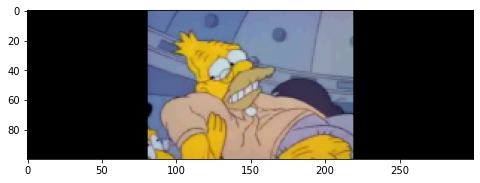

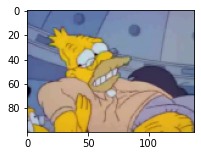

In [45]:
plt.figure(figsize=(8,3))
plt.imshow(imagenes_reescaladas[0])
plt.show()
plt.figure(figsize=(3,3))
plt.imshow(matriz[0])
plt.show()

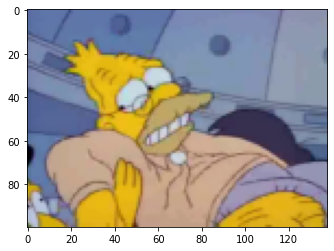

In [34]:
plt.imshow(matriz[0])

In [0]:
%mkdir MiProyecto
for i, j in enumerate(imagenes_reescaladas):
  plt.imsave('/content/MiProyecto/{}.jpg'.format(str(i+1).zfill(4)),imagenes_reescaladas[i])

In [0]:
!zip -r /content/MiProyecto.zip /content/MiProyecto

In [0]:
files.download('/content/MiProyecto.zip')